In [1]:
!pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import math
!pip install textblob
from textblob import TextBlob
plt.style.use('fivethirtyeight')

In [3]:
loraz

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Unnamed: 8,Location,Retweet Count,Subjectivity,Polarity,Analysis,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,2.184430e+09,1.690000e+18,en,2023-08-21 08:21:44+00:00,Lorazepam Stimulates IL6 Production and Is Ass...,22.0,Lorazepam Stimulates IL6 Production Associate...,17.0,NaN,0,0.300000,-0.200000,Negative,negative,1.0,NaN,NaN,NaN,NaN
1,2,1.690000e+18,1.690000e+18,en,2023-08-21 07:36:19+00:00,buy ativan online without prescription from TR...,20.0,buy ativan online prescription TRUST PHARMAC...,14.0,NaN,0,0.900000,0.400000,Positive,positive,2.0,NaN,NaN,NaN,NaN
2,3,1.250000e+18,1.690000e+18,en,2023-08-21 06:18:15+00:00,@JSchmanathan @loganzuber17 A great combinatio...,51.0,great combination many people use lorazepam ...,31.0,NaN,0,0.612500,0.475000,Positive,positive,3.0,NaN,NaN,NaN,NaN
3,4,1.340000e+18,1.690000e+18,en,2023-08-21 02:46:37+00:00,Time to take lorazepam and watch art restorati...,11.0,Time take lorazepam watch art restoration vi...,8.0,NaN,0,0.000000,0.000000,Neutral,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5.141896e+07,1.690000e+18,en,2023-08-21 02:37:30+00:00,@angelusmalusuk Im so sorry youâve gone thro...,52.0,sorry gone through this similar situation...,32.0,NaN,0,0.598214,-0.016071,Negative,negative,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,8.920000e+17,1.690000e+18,en,2023-08-14 19:05:57+00:00,it would have made so much more sense for her ...,57.0,would have made so much more sense come forwar...,39.0,NaN,0,0.600000,0.125000,Positive,positive,116.0,NaN,NaN,NaN,NaN
163,164,1.090000e+18,1.690000e+18,en,2023-08-14 18:17:41+00:00,RT @MayaBizri: Malignant catatonia (p.22) - up...,34.0,Malignant catatonia p.22 up lorazepam 24 mg x ...,26.0,NaN,2,0.000000,0.000000,Neutral,NaN,NaN,NaN,NaN,NaN,NaN
164,165,1.100000e+18,1.690000e+18,en,2023-08-14 16:24:04+00:00,@ChestersKaren Lorazepam is another common one...,11.0,Lorazepam another common one Didn't definitely...,7.0,NaN,0,0.500000,-0.150000,Negative,neutral,0.0,NaN,NaN,NaN,NaN
165,166,2.954949e+09,1.690000e+18,en,2023-08-14 16:00:15+00:00,@shahh Pray pray pray pray pray to God &amp; l...,35.0,Pray God lorazepam life saver Don't recommend...,19.0,NaN,0,0.450000,0.287500,Positive,positive,117.0,NaN,NaN,NaN,NaN


In [4]:
# Create a function to get the subjectivity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
def getPol(text):
    return TextBlob(text).sentiment.polarity

In [5]:
# Define a function to check if the input is a string
def is_string(input_text):
    return isinstance(input_text, str)

# Apply your functions with a condition to handle non-string values
loraz['Subjectivity1'] = loraz['New Tweet'].apply(lambda x: getSub(x) if is_string(x) else np.nan)
loraz['Polarity1'] = loraz['New Tweet'].apply(lambda x: getPol(x) if is_string(x) else np.nan)

In [6]:
loraz

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Unnamed: 8,Location,...,Polarity,Analysis,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Subjectivity1,Polarity1
0,1,2.184430e+09,1.690000e+18,en,2023-08-21 08:21:44+00:00,Lorazepam Stimulates IL6 Production and Is Ass...,22.0,Lorazepam Stimulates IL6 Production Associate...,17.0,NaN,...,-0.200000,Negative,negative,1.0,NaN,NaN,NaN,NaN,0.300000,-0.200000
1,2,1.690000e+18,1.690000e+18,en,2023-08-21 07:36:19+00:00,buy ativan online without prescription from TR...,20.0,buy ativan online prescription TRUST PHARMAC...,14.0,NaN,...,0.400000,Positive,positive,2.0,NaN,NaN,NaN,NaN,0.900000,0.400000
2,3,1.250000e+18,1.690000e+18,en,2023-08-21 06:18:15+00:00,@JSchmanathan @loganzuber17 A great combinatio...,51.0,great combination many people use lorazepam ...,31.0,NaN,...,0.475000,Positive,positive,3.0,NaN,NaN,NaN,NaN,0.612500,0.475000
3,4,1.340000e+18,1.690000e+18,en,2023-08-21 02:46:37+00:00,Time to take lorazepam and watch art restorati...,11.0,Time take lorazepam watch art restoration vi...,8.0,NaN,...,0.000000,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
4,5,5.141896e+07,1.690000e+18,en,2023-08-21 02:37:30+00:00,@angelusmalusuk Im so sorry youâve gone thro...,52.0,sorry gone through this similar situation...,32.0,NaN,...,-0.016071,Negative,negative,4.0,NaN,NaN,NaN,NaN,0.598214,-0.016071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,8.920000e+17,1.690000e+18,en,2023-08-14 19:05:57+00:00,it would have made so much more sense for her ...,57.0,would have made so much more sense come forwar...,39.0,NaN,...,0.125000,Positive,positive,116.0,NaN,NaN,NaN,NaN,0.600000,0.125000
163,164,1.090000e+18,1.690000e+18,en,2023-08-14 18:17:41+00:00,RT @MayaBizri: Malignant catatonia (p.22) - up...,34.0,Malignant catatonia p.22 up lorazepam 24 mg x ...,26.0,NaN,...,0.000000,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
164,165,1.100000e+18,1.690000e+18,en,2023-08-14 16:24:04+00:00,@ChestersKaren Lorazepam is another common one...,11.0,Lorazepam another common one Didn't definitely...,7.0,NaN,...,-0.150000,Negative,neutral,0.0,NaN,NaN,NaN,NaN,0.500000,-0.150000
165,166,2.954949e+09,1.690000e+18,en,2023-08-14 16:00:15+00:00,@shahh Pray pray pray pray pray to God &amp; l...,35.0,Pray God lorazepam life saver Don't recommend...,19.0,NaN,...,0.287500,Positive,positive,117.0,NaN,NaN,NaN,NaN,0.450000,0.287500


In [7]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
loraz['Analysis1'] = loraz['Polarity1'].apply(getAnalysis)

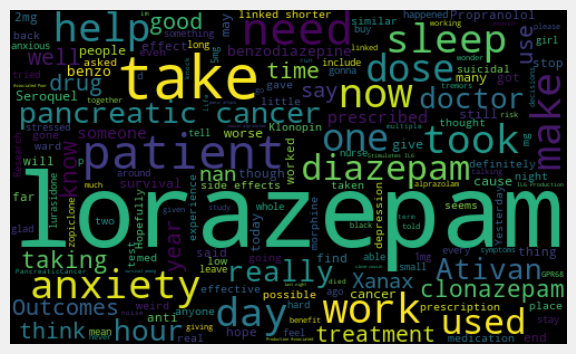

In [9]:
# Filter out non-string values (NaN or floats)
loraz['New Tweet'] = loraz['New Tweet'].astype(str)

# Plot Word Cloud
allWords = ' '.join([twts for twts in loraz['New Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [1]:
# Plot Bar chart
ax = loraz['Analysis1'].value_counts().plot(kind='bar', color='yellow')
ax.set_xlabel("Sentiments", fontsize=12)

NameError: name 'loraz' is not defined